# ECON 416 - Final Project
#####*Gabby Michals*
####**An Analysis of the UN's Sustainable Development Goal #11**
-----
**Introduction:**

In 2015, the UN's member nations developed and adopted what is called the United Nation's Sustainable Development Goals ([SDGs](https://sdgs.un.org/goals)). These 17 goals are what they determined to be the most crucial social and economic problems challenging us globally, some of which include: no poverty, climate change, zero hunger, etc. While these may seem obvious, some of the other goals aren't as intuitive to think of as being some of our most dire needs, including: industry,innovation, and growth; sustainable cities and communities; responsible consumption and production; etc.

The member nations had decided that all 17 goals must be completed by the year 2030. Being that we are at the cusp of entering 2024, we essentially have a mere 6 years to complete each of our 17 goals. I chose particularly to focus on SDG 11 progress -- Sustainable Cities and Communities -- here in the US. Cities are seen as agglomerations of excitement, innovation, cultures, etc., so to analyze whether the epitomes progress (cities) have truly progressed or not is a very interesting concept overall.

Each goal is measured by various indicators determined by the UN and its various agencies. For SDG 11, the indicators are: Air pollution, Sustainable Commuting, Overcrowded Housing, Rent Burden, Eviction Rate, and Racial Disparity in Homelessness.

The exact research question for my analysis is:
Is the US making any real progress in the completion of SDG 11?

Answering this question will come in a variety of analyses:
* An exploratory analysis of which states / regions are doing the best
* Whether indicators have made progress over time
* Computation and interpretation of various summary statistics and figures
----


#####**Literature Review**
When it comes to research done for other goals, such as the mitigation of climate change (SDG 13) or no poverty (SDG 1), there's virtuously endless economic research available on these issues. Additionally, these goals have been the topics of many economic classes and fields, essentially making it second nature for any economist, economics student, etc. to learn about or discuss. Sustainable Cities (SDG 11), however, falls at the intersection of many social, environmental, and economic dilemmas, making it a less widely-taught and widely-researched field.

The main source of data I have used for my analysis of SDG 11 has been gathered by the information collected by the UN's Sustainable Development Solutions Network ([SDSN](https://www.unsdsn.org/)). The SDSN has done exemplary work in collecting data from various global regions, countries, and cities on their respective progress of the various SDGs. The have also compiled various reports called "Sustainable Development Reports" that gave me access to a comprehensive background on each goal and overall trends and progress within the United States. The data I have used for my coding analysis sections was retreived from the [SDSN's reports and supplementary materials](https://us-states.sdgindex.org/downloads) for their *United States Sustainable Development Report 2021*, which houses the databases for the raw data that shows the measured SDG indicators over time for each state in the US.

My analyses contribute to the previous research due to the fact that all of the analysis has been done using Python. The usage of Python and various packages have allowed me to analyze a unique variety of questions based on the raw data. In addition to this, I have been able to create customized visualizations to show different ways of tracking progress for the SDG 11 indicators. Finally, my analyses have contributed to the previous research by analyzing the data on a regional level rather than just a state level. By doing so, we can visualize and detect broader trends that may be in play.

####**Analysis**

####Section I: Loading in Dataset and Data Cleaning

In [ ]:
#importing relevant packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#creating a dataframe of the raw data
sdg_11 = pd.read_csv("US_SDG_DATASET.csv")

In [ ]:
#cleaning the data to only contain information that is relevant to SDG 11
for column in sdg_11.columns:
  if "sdg1v" in column:
    del sdg_11[column]
  elif "sdg2v" in column:
    del sdg_11[column]
  elif "sdg3v" in column:
    del sdg_11[column]
  elif "sdg4v" in column:
    del sdg_11[column]
  elif "sdg5v" in column:
    del sdg_11[column]
  elif "sdg6v" in column:
    del sdg_11[column]
  elif "sdg7v" in column:
    del sdg_11[column]
  elif "sdg8v" in column:
    del sdg_11[column]
  elif "sdg9v" in column:
    del sdg_11[column]
  elif "sdg10v" in column:
    del sdg_11[column]
  elif "sdg12v" in column:
    del sdg_11[column]
  elif "sdg13v" in column:
    del sdg_11[column]
  elif "sdg14v" in column:
    del sdg_11[column]
  elif "sdg15v" in column:
    del sdg_11[column]
  elif "sdg16v" in column:
    del sdg_11[column]
  elif "sdg17v" in column:
    del sdg_11[column]

In [ ]:
sdg_11.head() #Cleaned dataframe

,US state,State abbrv,year,sdg11v1_pm25,sdg11v2_commute,sdg11v3_overcrowding,sdg11v4_rentBurden,sdg11v5_evictionRate,sdg11v6_homeless_rl
0,Alabama,AL,2021,NaN,NaN,NaN,NaN,NaN,NaN
1,Alabama,AL,2020,NaN,NaN,NaN,NaN,NaN,NaN
2,Alabama,AL,2019,8.0,2.0,2.0,47.0,NaN,6.0
3,Alabama,AL,2018,NaN,NaN,NaN,48.0,NaN,3.0
4,Alabama,AL,2017,NaN,NaN,NaN,47.0,NaN,3.0


**What is in the dataframe?**

The following are descriptions of each column in the cleaned dataframe:
* US state: the US State being recorded
* State abbrv: the abbreviation used to denote the respective state recorded
* year: the year the measurement was recorded
* sdg11v1_pm25: value recorded for exposure to air pollution(PM 2.5) (micrograms per cubic meter)
* sdg11v2_commute: value recorded for sustainable transportation (% of commuters)
* sdg11v3_overcrowding: value recorded for overcrowded housing (% of occupied housing units)
* sdg11v4_rentBurden: value recorded for rent burdened population (%)
* sdg11v5_evictionRate: value recorded for eviction rate (per 100 households)
* sdg11v6_homeless_rl: value recorded for racial disparity in homelessness (times higher)

####Section II - State Analysis:

In this section, I begin my exploratory analysis. I find the average indicator measurement for each US state and see which states rank higher in terms of progress relative to other states.

**Note**: "Sustainable Commuting" is the only indicator in which a higher value represents a better rank / more progress. Every other column (air pollution, overcrowding, rent burden, eviction rate, racial disparity) rank higher with a lower mean value.

In the following code I:

1) Isolate the relevant columns  (US State and the individual indicator)

2) Drop any NA values to remove any rows that have missing data

3) group by the state and calculate the average indicator measurement for that state

4) sort the values to isolate the relative top 10 performing US States for each indicator

In [ ]:
#Relative top 10 States for Indicator 1 (based on average value)
pm25 = sdg_11[['sdg11v1_pm25', "US state"]].dropna().groupby("US state").mean().sort_values('sdg11v1_pm25',ascending = True)[:10]
pm25 = pm25.reset_index()

In [ ]:
#Relative top 10 States for Indicator 2 (based on average value)
commute = sdg_11[['sdg11v2_commute', "US state"]].dropna().groupby("US state").mean().sort_values('sdg11v2_commute',ascending = False)[:10]
commute = commute.reset_index()

In [ ]:
#Relative top 10 States for Indicator 3 (based on average value)
overcrowding = sdg_11[['sdg11v3_overcrowding', "US state"]].dropna().groupby("US state").mean().sort_values('sdg11v3_overcrowding',ascending = True)[:10]
overcrowding = overcrowding.reset_index()

In [ ]:
#Relative top 10 States for Indicator 4 (based on average value)
rent_burden = sdg_11[['sdg11v4_rentBurden', "US state"]].dropna().groupby("US state").mean().sort_values('sdg11v4_rentBurden',ascending = True)[:10]
rent_burden = rent_burden.reset_index()

In [ ]:
#Relative top 10 States for Indicator 5 (based on average value)
eviction = sdg_11[['sdg11v5_evictionRate', "US state"]].dropna().groupby("US state").mean().sort_values('sdg11v5_evictionRate',ascending = True)[:10]
eviction = eviction.reset_index()

In [ ]:
#Relative top 10 States for Indicator 6 (based on average value)
homeless_rl = sdg_11[['sdg11v6_homeless_rl', "US state"]].dropna().groupby("US state").mean().sort_values('sdg11v6_homeless_rl',ascending = True)[:10]
homeless_rl = homeless_rl.reset_index()

In order to figure out how many states are doing the best relative to the other states, I created an empty list followed by for loops that added each of the top 10 states for every indicator to the empty list.

In [ ]:
top_states = [] #empty list
for index in pm25.index:
  top_states.append(pm25.iloc[index]["US state"]) #adds every state from pm25 df
for index in commute.index:
  top_states.append(commute.iloc[index]["US state"]) #adds every state from commute df
for index in overcrowding.index:
  top_states.append(overcrowding.iloc[index]["US state"]) #adds every state from overcrowding df
for index in rent_burden.index:
  top_states.append(rent_burden.iloc[index]["US state"]) #adds every state from rent_burden df
for index in eviction.index:
  top_states.append(eviction.iloc[index]["US state"]) #adds every state from eviction df
for index in homeless_rl.index:
  top_states.append(homeless_rl.iloc[index]["US state"]) #adds every state from homeless_rl df

print(top_states) #prints off top_states list that shows relative top 10 for each indicator

['Wyoming', 'North Dakota', 'Hawaii', 'South Dakota', 'New Mexico', 'Alaska', 'Montana', 'Vermont', 'Colorado', 'New Hampshire', 'New York', 'Massachusetts', 'New Jersey', 'Illinois', 'Maryland', 'Hawaii', 'Washington', 'Oregon', 'Alaska', 'Pennsylvania', 'Ohio', 'New Hampshire', 'Pennsylvania', 'Maine', 'West Virginia', 'Tennessee', 'South Dakota', 'South Carolina', 'Rhode Island', 'Virginia', 'North Dakota', 'South Dakota', 'Wyoming', 'Nebraska', 'Iowa', 'Kansas', 'Montana', 'Oklahoma', 'Alaska', 'Wisconsin', 'Vermont', 'Hawaii', 'Wyoming', 'Maryland', 'Montana', 'Washington', 'Idaho', 'Utah', 'New Jersey', 'New York', 'New Mexico', 'Nevada', 'Louisiana', 'Oklahoma', 'Alabama', 'Arkansas', 'Arizona', 'Mississippi', 'Hawaii', 'Tennessee']


I next converted the above ```top_states``` list into a dataframe that consists of each state housed in the list along with how many time that state was featured



In [ ]:
top_states_df = pd.DataFrame(top_states, columns = ["US state"]) #df of just the US states
top_states_df = pd.DataFrame(top_states_df.value_counts(), columns = ["count"]) #df of count of each distinct state
top_states_df = top_states_df.reset_index() #reset index

----
I next used code that allowed me to isolate specific colors from a pre-existing seaborn palette and then blended those colors in order to create a color palette that blended from green --> yellow --> red.

This kind of palette is useful in visualizations in order to see which observations are doing good (green), just okay (yellow), and bad (red)

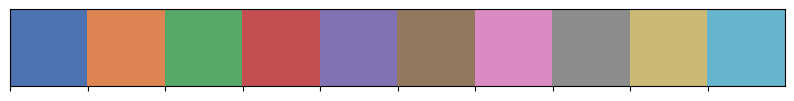

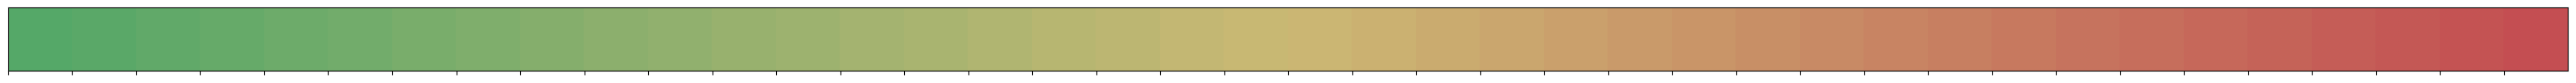

In [ ]:
deep_pal = sns.color_palette('deep')
sns.palplot(deep_pal)
good_bad = sns.blend_palette([deep_pal[2], deep_pal[8], deep_pal[3]], 40)
sns.palplot(good_bad)

The code below is a plot of the dataframe of the relative top performing US States.

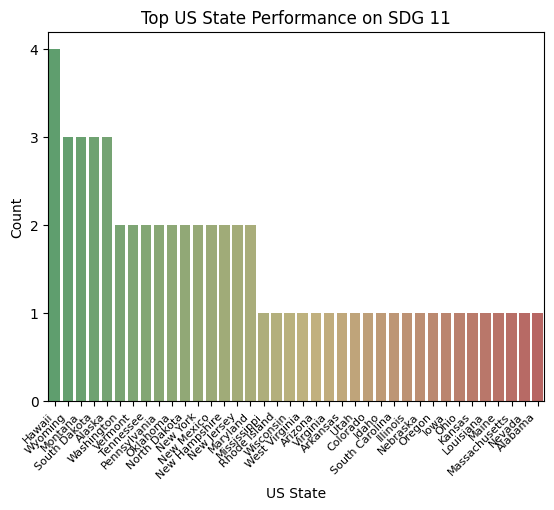

In [ ]:
sns.set_palette(good_bad) #set color palette
sns.barplot(top_states_df, x = "US state", y = "count") #create barplot
plt.xticks(rotation = 45, horizontalalignment = "right", fontsize = 8) #fix the x-tick labels
plt.yticks(np.linspace(0,4,5)) #adjust y-tick spacing
plt.title("Top US State Performance on SDG 11") #create title
plt.ylabel("Count") #y-axis label
plt.xlabel("US State"); #x-axis label

####Section III - Regional Analysis:

In order to perform regional analysis, I assigned each state into a region based off of the [US Census Bureau's definition of the US Regions](https://www2.census.gov/geo/pdfs/maps-data/maps/reference/us_regdiv.pdf). I assigned regions by creating a column that shows the corresponding region for each state in the dataframe.

######**Relative Regional performance:**

In [ ]:
sdg_11["Region"] = "South" #creation of a region column, assigning every state to the "South" region

In [ ]:
Northeast = ["CT","MA","ME", "NH","RI","VT","NJ","NY","PA"] #list of each state in the Northeast
for state in Northeast: #for loop that replaces each of these states' region values to "Northeast" instead of "South"
  sdg_11.loc[sdg_11["State abbrv"] == state, "Region"] = "Northeast"

In [ ]:
West = ["WA", "MT", "OR", "ID", "WY", "CA", "NV", "UT", "CO", "AZ", "NM", "AK", "HI"] #list of each state in the West
for state in West: #for loop that replaces each of these states' region values to "West" instead of "South"
  sdg_11.loc[sdg_11["State abbrv"] == state, "Region"] = "West"

In [ ]:
midwest = ["ND", "SD", "NE", "KS", "MN", "IA", "MO", "WI", "IL", "IN", "MI", "OH"] #list of each state in the Midwest
for state in midwest: #for loop that replaces each of these states' region values to "Midwest" instead of "South"
  sdg_11.loc[sdg_11["State abbrv"] == state, "Region"] = "Midwest"

The code below follows the same process as the code used to create the indicator dataframes above, but grouping by US regions rather than US states.

In [ ]:
v1 = sdg_11[['sdg11v1_pm25', "Region", "year"]].dropna().groupby("Region").mean().sort_values('sdg11v1_pm25',ascending = True)
v1 = v1.reset_index()
v2 = sdg_11[['sdg11v2_commute', "Region"]].dropna().groupby("Region").mean().sort_values('sdg11v2_commute',ascending = False)
v2 = v2.reset_index()
v3 = sdg_11[['sdg11v3_overcrowding', "Region"]].dropna().groupby("Region").mean().sort_values('sdg11v3_overcrowding',ascending = True)
v3 = v3.reset_index()
v4 = sdg_11[['sdg11v4_rentBurden', "Region"]].dropna().groupby("Region").mean().sort_values('sdg11v4_rentBurden',ascending = True)
v4 = v4.reset_index()
v5 = sdg_11[['sdg11v5_evictionRate', "Region"]].dropna().groupby("Region").mean().sort_values('sdg11v5_evictionRate',ascending = True)
v5 = v5.reset_index()
v6 = sdg_11[['sdg11v6_homeless_rl', "Region"]].dropna().groupby("Region").mean().sort_values('sdg11v6_homeless_rl',ascending = True)
v6 = v6.reset_index()

In [ ]:
top_regions = []
indicators = [v1,v2,v3,v4,v5,v6]
for i in indicators:
  top_regions.append(i.iloc[0]["Region"])

In [ ]:
top_regions_df = pd.DataFrame(top_regions, columns = ["US Region"])
top_regions_df = pd.DataFrame(top_regions_df.value_counts(), columns = ["count"])
top_regions_df = top_regions_df.reset_index()

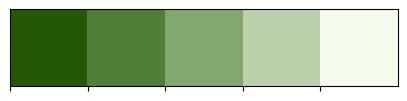

In [ ]:
green_fade = sns.blend_palette(["#245708", "#82a66d", "#f3fced"], 5) #creating another custom color palette for the graph below
sns.palplot(green_fade)

The graph below visualizes the relative average SDG 11 indicator performance by US region rather than by US state.

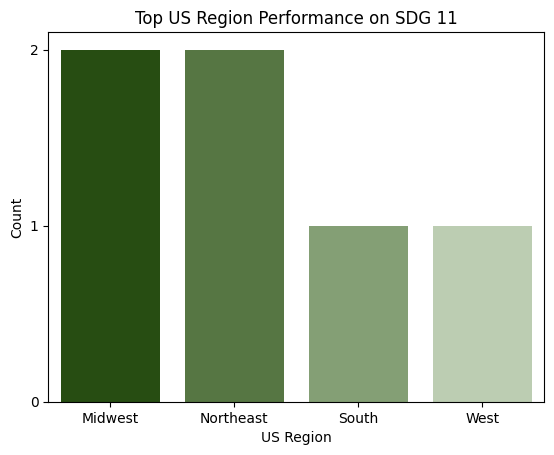

In [ ]:
sns.set_palette(green_fade) #set color palette
sns.barplot(top_regions_df, x = "US Region", y = "count") #create barplot
plt.yticks(np.linspace(0,2,3)) #adjust y-tick spacing
plt.title("Top US Region Performance on SDG 11") #create title
plt.ylabel("Count") #-axis label
plt.xlabel("US Region"); #x-axis label

######**Regional performance based on optimal values:**

In the same dataset that contained the raw data for indicator measurement over time for US states, there was also a codebook included which explained each indicator, the optimal indicator value that signifies completetion, and indicator thresholds that correspond to level of progress (i.e., good progress, somewhat decent progress, little/no progress).

I use this codebook to perform regional analysis to determine whether each region was making progress for each individual SDG 11 indicator. I use the threshold values and optimal values of each indicator to determine whether each region is: making good progress: "green zone", somewhat decent progress: "yellow/orange zone", or little/no progress: "red zone".

In order to do so I took the regional dataframes from the previous section and joined them into one dataframe in order to visualize and analyze them all together. I began by looking at average indicator values for each region and then continued by looking at regional indicator values over time.



In [ ]:
#this code re-sorts each previous dataframe to be in alphabetical order by Region and then resets the index after re-sorting
v1 =v1.sort_values("Region", ascending = True).reset_index().drop(columns = "index")
v2 =v2.sort_values("Region", ascending = True).reset_index().drop(columns = "index")
v3 =v3.sort_values("Region", ascending = True).reset_index().drop(columns = "index")
v4 =v4.sort_values("Region", ascending = True).reset_index().drop(columns = "index")
v5 =v5.sort_values("Region", ascending = True).reset_index().drop(columns = "index")
v6 =v6.sort_values("Region", ascending = True).reset_index().drop(columns = "index")

In [ ]:
#this code joins all of the individual dataframes into one new dataframe of each average indicator value by region
mean_indicators = v1.set_index("Region").join(v2.set_index("Region"))
mean_indicators = mean_indicators.join(v3.set_index("Region"))
mean_indicators = mean_indicators.join(v4.set_index("Region"))
mean_indicators = mean_indicators.join(v5.set_index("Region"))
mean_indicators = mean_indicators.join(v6.set_index("Region"))
mean_indicators = mean_indicators.reset_index()
mean_indicators #new dataframe

,Region,sdg11v1_pm25,year,sdg11v2_commute,sdg11v3_overcrowding,sdg11v4_rentBurden,sdg11v5_evictionRate,sdg11v6_homeless_rl
0,Midwest,9.333333,2011.5,5.166667,2.000000,45.750000,3.005882,12.466667
1,Northeast,9.055556,2011.5,11.777778,2.111111,50.711111,1.814286,23.888889
2,South,10.270833,2011.5,3.937500,2.406250,50.068750,3.764228,5.975000
3,West,8.128205,2011.5,7.461538,4.307692,49.361538,2.274510,6.230769


The code below was written to assign a color(red, yellow/orange/, or green) to each average indicator value for each region.

In [ ]:
#puts the value of each indicator for each region into its own list
v1_vals = mean_indicators["sdg11v1_pm25"].sort_values().tolist()
v2_vals = mean_indicators["sdg11v2_commute"].sort_values().tolist()
v3_vals = mean_indicators["sdg11v3_overcrowding"].sort_values().tolist()
v4_vals = mean_indicators["sdg11v4_rentBurden"].sort_values().tolist()
v5_vals = mean_indicators["sdg11v5_evictionRate"].sort_values().tolist()
v6_vals = mean_indicators["sdg11v6_homeless_rl"].sort_values().tolist()


In [ ]:
v1_color = [] #empty list
for val in v1_vals: #loops through every average regional value for indicator 1
  if val >= 10: #if the value is at 10 or above, the region is in the bad zone.
    v1_color.append("red")
  elif val > 8 and val < 10: #is the value is in between 8 and 10, the region is in the okay zone
    v1_color.append("#f5c842")
  else: #if the value is below 8, the region is in the good zone.
    v1_color.append("green")


In [ ]:
#repeat the same code for  indicator 2 with respective indicator thresholds
v2_color = []
for val in v2_vals:
  if val <= 5:
    v2_color.append("green")
  elif val < 8 and val > 5:
    v2_color.append("#f5c842")
  else:
    v2_color.append("red")

In [ ]:
#repeat the same code for indicator 3 with respective indicator thresholds
v3_color = []
for val in v3_vals:
  if val >= 3:
    v3_color.append("red")
  elif val > 2 and val < 3:
    v3_color.append("#f5c842")
  else:
    v3_color.append("green")

In [ ]:
#repeat the same code for indicator 4 with respective indicator thresholds
v4_color = []
for val in v4_vals:
  if val >= 50:
    v4_color.append("red")
  elif val > 40 and val < 50:
    v4_color.append("#f5c842")
  else:
    v4_color.append("green")

In [ ]:
#repeat the same code for indicator 5 with respective indicator thresholds
v5_color = []
for val in v5_vals:
  if val >= 3:
    v5_color.append("red")
  elif val > 2 and val < 3:
    v5_color.append("#f5c842")
  else:
    v5_color.append("green")

In [ ]:
#repeat the same code for indicator 6 with respective indicator thresholds
v6_color = []
for val in v6_vals:
  if val >= 2:
    v6_color.append("red")
  elif val > 1 and val < 2:
    v6_color.append("#f5c842")
  else:
    v6_color.append("green")

The code below produces a figure with six graphs, with one subplot for each individual indicator. Each graph contains a horizontal black line that represents the optimal value that was determined by SDG mandates, the Organisation for Economic Co-operation and Development [(OECD)](https://www.oecd.org/unitedstates/), etc.

* If the bar is green, the region is doing good, on average.
* If the bar is yellow/orange, the region is doing okay, on average.
* If the bar is red, the region is doing bad, on average.

**The bars should be at or extremely close to the horizontal black line to be considered to be at the optimal level / a completed SDG 11 indicator.**

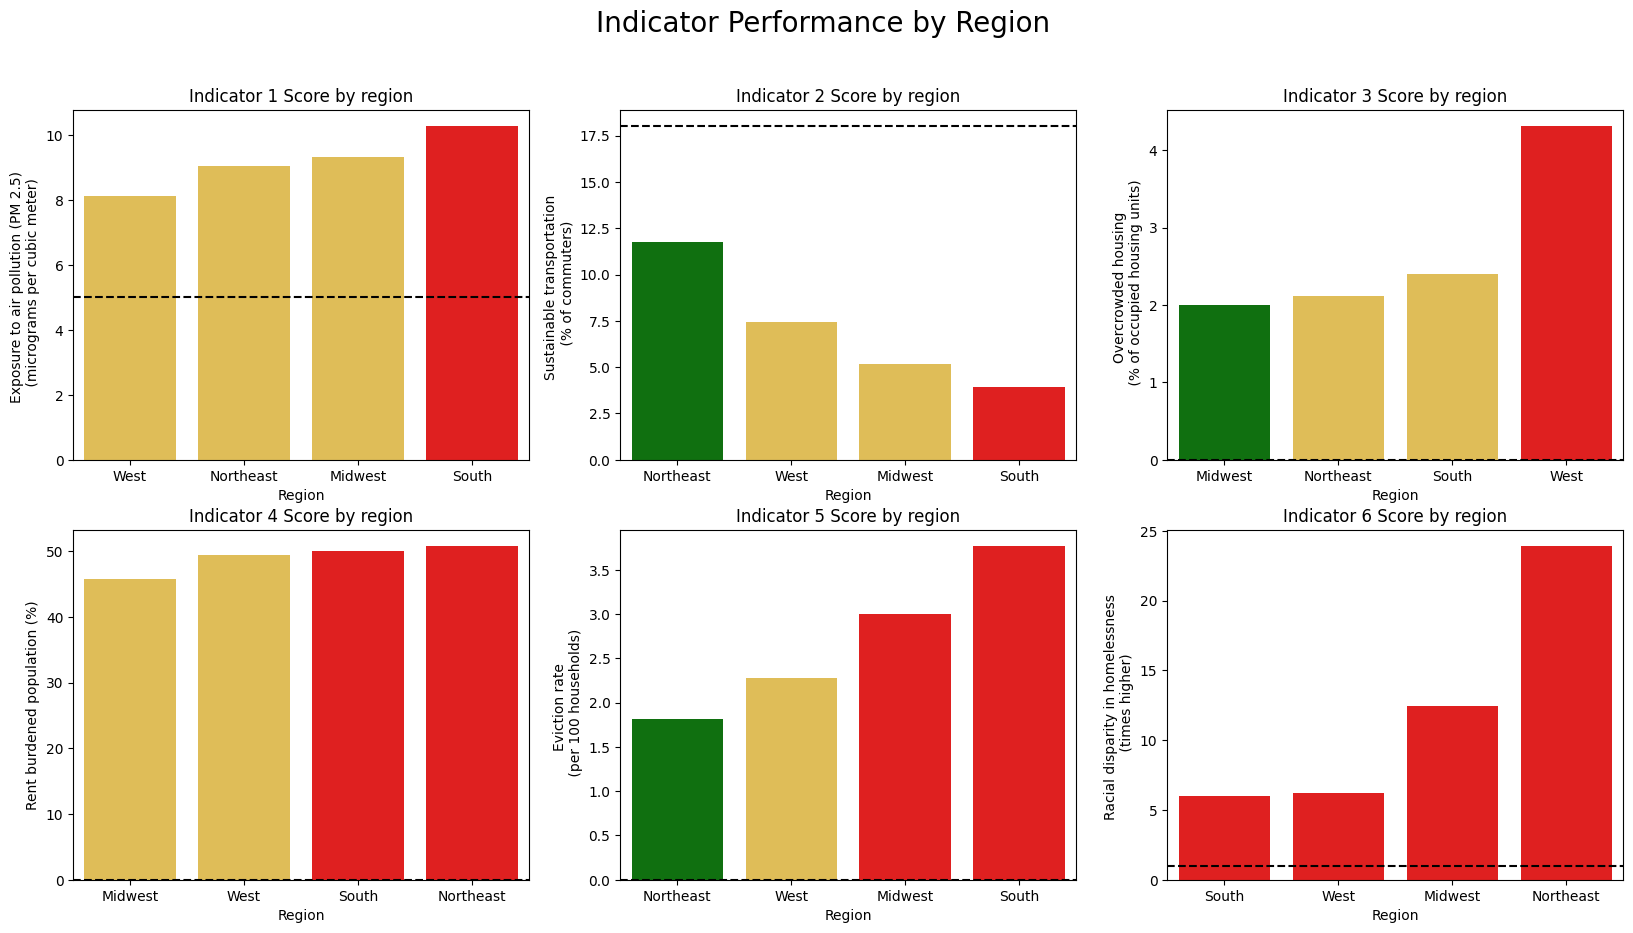

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10)) #creates a figure with 2 rows and 3 columns and specific dimensions
fig.suptitle("Indicator Performance by Region", fontsize = "20") #creates a title for the entire figure
sns.barplot(ax=axes[0,0], x="Region", y="sdg11v1_pm25", data = mean_indicators.sort_values('sdg11v1_pm25',ascending = True), palette = v1_color) #creates plot for indicator 1
axes[0,0].set(xlabel='Region', ylabel='Exposure to air pollution (PM 2.5) \n (micrograms per cubic meter)', title='Indicator 1 Score by region') #sets axis labels and titles
axes[0,0].axhline(y=5, linestyle='--', color = "black") #draws horizontal line for optimal value

sns.barplot(ax=axes[0,1], x="Region", y="sdg11v2_commute", data = mean_indicators.sort_values('sdg11v2_commute',ascending = False), palette = v2_color)#creates plot for indicator 2
axes[0,1].set(xlabel='Region', ylabel='Sustainable transportation \n (% of commuters)', title='Indicator 2 Score by region') #sets axis labels and titles
axes[0,1].axhline(y=18, linestyle='--', color = "black") #draws horizontal line for optimal value

sns.barplot(ax=axes[0,2], x="Region", y="sdg11v3_overcrowding", data = mean_indicators.sort_values('sdg11v3_overcrowding',ascending = True), palette= v3_color)#creates plot for indicator 3
axes[0,2].set(xlabel='Region', ylabel='Overcrowded housing \n (% of occupied housing units)', title='Indicator 3 Score by region') #sets axis labels and titles
axes[0,2].axhline(y=0, linestyle='--', color = "black") #draws horizontal line for optimal value

sns.barplot(ax=axes[1,0], x="Region", y="sdg11v4_rentBurden", data = mean_indicators.sort_values('sdg11v4_rentBurden',ascending = True), palette = v4_color)#creates plot for indicator 4
axes[1,0].set(xlabel='Region', ylabel='Rent burdened population (%)', title='Indicator 4 Score by region') #sets axis labels and titles
axes[1,0].axhline(y=0, linestyle='--', color = "black") #draws horizontal line for optimal value

sns.barplot(ax=axes[1,1], x="Region", y="sdg11v5_evictionRate", data = mean_indicators.sort_values('sdg11v5_evictionRate',ascending = True), palette = v5_color)#creates plot for indicator 5
axes[1,1].set(xlabel='Region', ylabel='Eviction rate \n (per 100 households)', title='Indicator 5 Score by region') #sets axis labels and titles
axes[1,1].axhline(y=0, linestyle='--', color = "black") #draws horizontal line for optimal value

sns.barplot(ax=axes[1,2], x="Region", y="sdg11v6_homeless_rl", data = mean_indicators.sort_values('sdg11v6_homeless_rl',ascending = True), palette = v6_color)#creates plot for indicator 6
axes[1,2].set(xlabel='Region', ylabel='Racial disparity in homelessness \n (times higher)', title='Indicator 6 Score by region') #sets axis labels and titles
axes[1,2].axhline(y=1, linestyle='--', color = "black");#draws horizontal line for optimal value

######**Regional performance over time:**


In [ ]:
sns.set_palette("tab10") #sets a different color palette

The code below displays six lineplots to show SDG 11 indicator performance over time by region, including a horizontal purple line that indicates optimal value. This is followed by additional calculations that show how much the indicator measurements have to change, on average, from 2019 (the most rescent year in the dataset) to reach the optimal level by 2030.

In [ ]:
#creates a dataframe of average indicator values by region in the year 2019
recent = sdg_11.loc[sdg_11["year"] == 2019]
recent = recent.groupby("Region").mean(numeric_only = True)
recent = recent.reset_index()

**Indicator 1**

Text(0.5, 1.0, 'Indicator 1 Performance Over Time by US Region')

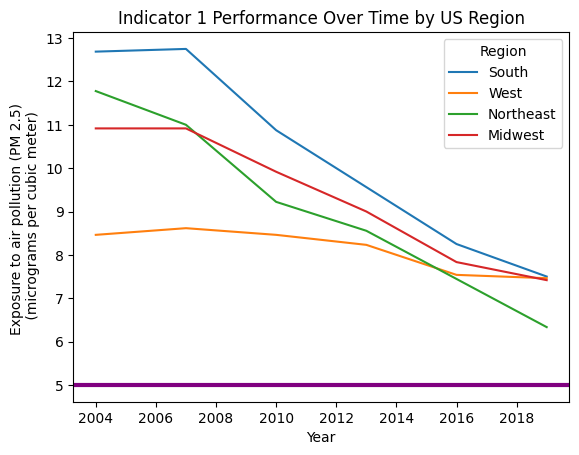

In [ ]:
sns.lineplot(data = sdg_11, x = "year", y = "sdg11v1_pm25", hue = "Region", errorbar = None) #creates a lineplot of performance over time by region
plt.axhline(y=5, color = "purple", linewidth = 3) #creates horizontal line
plt.xlabel("Year") #x-axis label
plt.ylabel("Exposure to air pollution (PM 2.5) \n (micrograms per cubic meter)") #y-axis label
plt.title("Indicator 1 Performance Over Time by US Region") #title

In [ ]:
for index in recent.index:
  print("The " + recent.iloc[index]["Region"]+ f' will have to lower their average exposure to air pollution by {((recent.iloc[index]["sdg11v1_pm25"] - 5)/(2030-2019)).round(2)} micrograms per cubic meter per year to reach the optimum value from 2019-2030 \n')

The Midwest will have to lower their average exposure to air pollution by 0.22 micrograms per cubic meter per year to reach the optimum value from 2019-2030 

The Northeast will have to lower their average exposure to air pollution by 0.12 micrograms per cubic meter per year to reach the optimum value from 2019-2030 

The South will have to lower their average exposure to air pollution by 0.23 micrograms per cubic meter per year to reach the optimum value from 2019-2030 

The West will have to lower their average exposure to air pollution by 0.22 micrograms per cubic meter per year to reach the optimum value from 2019-2030 



-------
**Indicator 2**

Text(0.5, 1.0, 'Indicator 2 Performance Over Time by US Region')

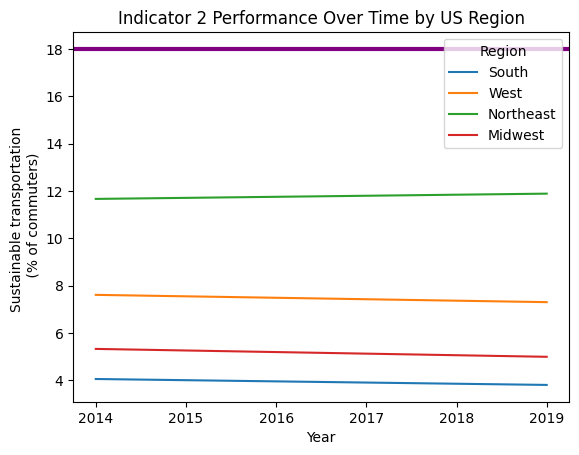

In [ ]:
#repeat the same code as above, but for indicator 2
sns.lineplot(data = sdg_11, x = "year", y = "sdg11v2_commute", hue = "Region",errorbar = None)
plt.axhline(y=18,  color = "purple", linewidth = 3)
plt.xlabel("Year")
plt.ylabel("Sustainable transportation \n (% of commuters)")
plt.title("Indicator 2 Performance Over Time by US Region")

In [ ]:
for index in recent.index:
  print("The " + recent.iloc[index]["Region"]+ f' will have to increase their commuter rate by {((18 - recent.iloc[index]["sdg11v2_commute"])/(2030-2019)).round(2)}% per year to reach the optimum value from 2019-2030 \n')

The Midwest will have to increase their commuter rate by 1.18% per year to reach the optimum value from 2019-2030 

The Northeast will have to increase their commuter rate by 0.56% per year to reach the optimum value from 2019-2030 

The South will have to increase their commuter rate by 1.29% per year to reach the optimum value from 2019-2030 

The West will have to increase their commuter rate by 0.97% per year to reach the optimum value from 2019-2030 



-------
**Indicator 3**

Text(0.5, 1.0, 'Indicator 3 Performance Over Time by US Region')

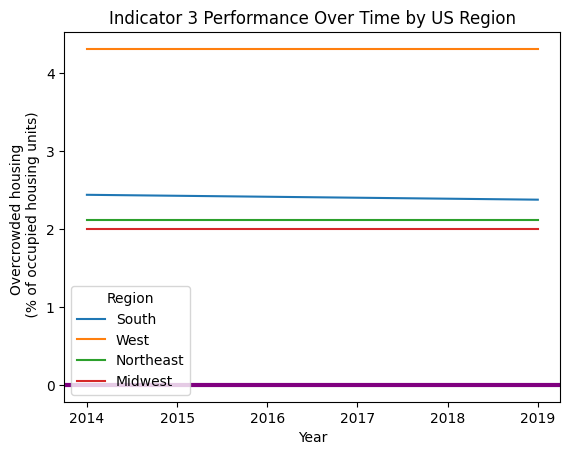

In [ ]:
#repeat the same code as above, but for indicator 3
sns.lineplot(data = sdg_11, x = "year", y = "sdg11v3_overcrowding", hue = "Region", errorbar = None)
plt.axhline(y=0, color = "purple", linewidth = 3)
plt.xlabel("Year")
plt.ylabel("Overcrowded housing \n (% of occupied housing units)")
plt.title("Indicator 3 Performance Over Time by US Region")

In [ ]:
for index in recent.index:
  print("The " + recent.iloc[index]["Region"]+ f' will have to lower their average Overcrowding Rate by {((recent.iloc[index]["sdg11v3_overcrowding"] - 0)/(2030-2019)).round(2)}% per year to reach the optimum value from 2019-2030 \n')

The Midwest will have to lower their average Overcrowding Rate by 0.18% per year to reach the optimum value from 2019-2030 

The Northeast will have to lower their average Overcrowding Rate by 0.19% per year to reach the optimum value from 2019-2030 

The South will have to lower their average Overcrowding Rate by 0.22% per year to reach the optimum value from 2019-2030 

The West will have to lower their average Overcrowding Rate by 0.39% per year to reach the optimum value from 2019-2030 



-------
**Indicator 4**

Text(0.5, 1.0, 'Indicator 4 Performance Over Time by US Region')

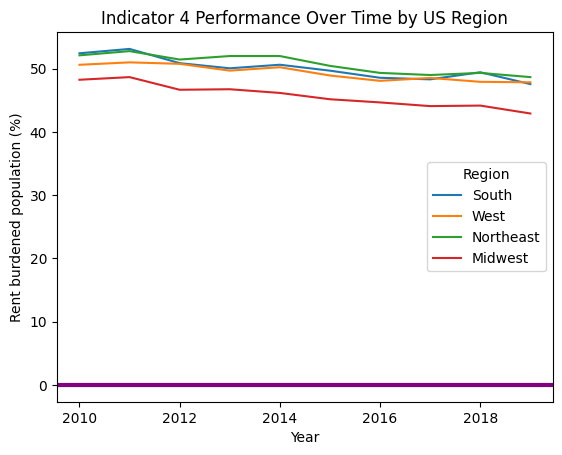

In [ ]:
#repeat the same code as above, but for indicator 4
sns.lineplot(data = sdg_11, x = "year", y = "sdg11v4_rentBurden", hue = "Region", errorbar = None)
plt.axhline(y=0, color = "purple", linewidth = 3)
plt.xlabel("Year")
plt.ylabel("Rent burdened population (%)")
plt.title("Indicator 4 Performance Over Time by US Region")

In [ ]:
for index in recent.index:
  print("The " + recent.iloc[index]["Region"]+ f' will have to lower their average Rent Burden by {((recent.iloc[index]["sdg11v4_rentBurden"] - 0)/(2030-2019)).round(2)}% per year to reach the optimum value from 2019-2030 \n')

The Midwest will have to lower their average Rent Burden by 3.9% per year to reach the optimum value from 2019-2030 

The Northeast will have to lower their average Rent Burden by 4.42% per year to reach the optimum value from 2019-2030 

The South will have to lower their average Rent Burden by 4.32% per year to reach the optimum value from 2019-2030 

The West will have to lower their average Rent Burden by 4.35% per year to reach the optimum value from 2019-2030 



-------
**Indicator 5**

Text(0.5, 1.0, 'Indicator 5 Performance Over Time by US Region')

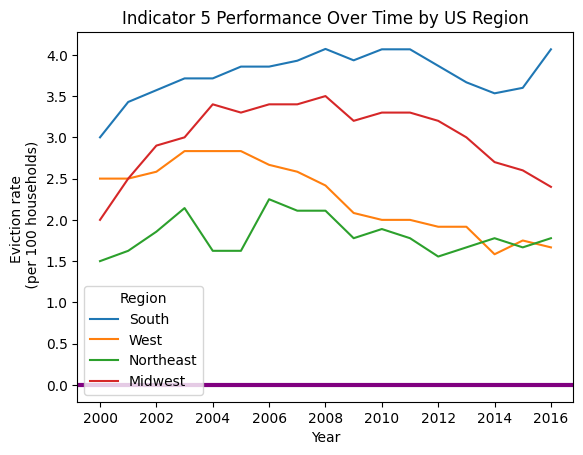

In [ ]:
#repeat the same code as above, but for indicator 5
sns.lineplot(data = sdg_11, x = "year", y = "sdg11v5_evictionRate", hue = "Region", errorbar = None)
plt.axhline(y=0, color = "purple", linewidth = 3)
plt.xlabel("Year")
plt.ylabel("Eviction rate \n (per 100 households)")
plt.title("Indicator 5 Performance Over Time by US Region")

**Note:** No calculation can be done for the average change in eviction rate from 2019 - 2030 required because there is no data recorded for this variable from the most recent year in the dataset.

-------
**Indicator 6**

Text(0.5, 1.0, 'Indicator 6 Performance Over Time by US Region')

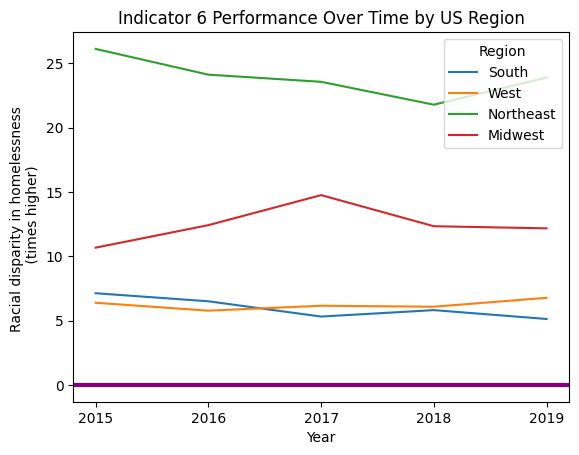

In [ ]:
#repeat the same code as above, but for indicator 6
sns.lineplot(data = sdg_11, x = "year", y = "sdg11v6_homeless_rl", hue = "Region", errorbar = None)
plt.xticks(np.linspace(2015,2019,5))
plt.axhline(y=0, color = "purple", linewidth = 3)
plt.xlabel("Year")
plt.ylabel("Racial disparity in homelessness \n (times higher)")
plt.title("Indicator 6 Performance Over Time by US Region")

In [ ]:
for index in recent.index:
  print("The " + recent.iloc[index]["Region"]+ f' will have to lower their average Racial Disparity of Homelessness by {((recent.iloc[index]["sdg11v6_homeless_rl"] - 1)/(2030-2019)).round(2)} units per year to reach the optimum value from 2019-2030 \n')

The Midwest will have to lower their average Racial Disparity of Homelessness by 1.02 units per year to reach the optimum value from 2019-2030 

The Northeast will have to lower their average Racial Disparity of Homelessness by 2.08 units per year to reach the optimum value from 2019-2030 

The South will have to lower their average Racial Disparity of Homelessness by 0.38 units per year to reach the optimum value from 2019-2030 

The West will have to lower their average Racial Disparity of Homelessness by 0.52 units per year to reach the optimum value from 2019-2030 



------
####**Results and Concluding Remarks:**


####_Section I Results & Discussion:_


> Section I consisted of an analysis of relative state performance based on average indicator measurements for each state. The ten highest ranking states for each indicator (those with the highest values for indicator 2 & those with the lowest values for indicators 1,3,4,5, and 6) were deemed to be the _relative_ top 10 states in SDG performance. It is important to mention that while these states did relatively well compared to other states, that does not mean they necessarily did well in terms of performance based on optimum SDG indicator levels.

> Out of 50 states:
* 38 individual states made it to the top 10 for at least 1 indicator
* Only 1 state -- Hawaii -- placed in the top 10 for 4 individual indicators
* 4 states placed in the top 10 for 3 individual indicators
* 11 states placed in the top ten for 2 individual indicators
* 22 states place in the top ten for only 1 individual indicator


####_Section II Results & Discussion:_
> Section II consisted of an analysis of relative regional performance based on average indicator measurements for each region defined by the US Census Bureau. While these regions did relatively well compared to other regions, that does not mean they necessarily did well in terms of performance based on optimum SDG indicator levels. Section II also included an analysis based on optimal SDG 11 indicator values and an analysis of performance over time

**Relative Performance**
> Out of the 4 regions:
* The Midwest performed the best on 2 individual indicators
* The Northeast performed the best on 2 individual indicators
* The West performed the best on 1 individual indicator
* The South performed the best on 1 individual indicator

* From the above results, we can conclude that each region performed the best for at least one of the six indicators. This is somewhat hopeful because this means that every region has somewhat of an "advantage" for at least one indicator compared to the other regions.

**Performance Based on Optimal Values**
> * The Midwest was:
    * In the red zone for 2/6 indicators
    * In the yellow / orange zone for 3/6 indicators
    * In the green zone for the 1/6 indicators
* The Northeast was:
  * In the red zone for 2/6 indicators
  * In the yellow / orange zone for 2/6 indicators
  * In the green zone for 2/6 indicators
* The West was:
  * In the red zone for 2/6 indicators
  * In the yellow / orange zone for 4/6 indicators
  * In the green zone for 0/6 indicators
* The South was:
  * In the red zone for 5/6 indicators
  * In the yellow / orange zone for 1/6 indicators
  * in the green zone for 0/6 indicators
* Additionally:
  * Only 3/24 observations were in the green zone
  * 10/24 observations were in the yellow / orange zone
  * 11/24 observations were in the red zone
  * All regions were in the red zone for Indicator 6

* From the above results, we can conclude that, on a regional level, the United States has a lot of work to do when it comes to achieving the goals for SDG 11. The South performed the worse, followed by the West, followed by the Midwest, and finally by the Northeast, which performed the best.

**Performance Over Time**
> The following is the results for each region's indicator values over time:
* Indicator 1 -- Air Pollution:
  * All regions have a steep downward sloping curve trending toward the optimal value of 5 micrograms of air pollution per cubic meter. Additionally, the gap between the values for the regions and the line showing the optimal value is relatively small, implying that completion of this goal is feasible.
* Indicator 2 -- Sustainable Commuting:
  * The lines for each region are relatively constant over time, not really showing much improvement. Additionally, the gap between these lines and the line showing the optimal value is quite large.
* Indicator 3 -- Overcrowded Housing:
  * The results for this indicator follow the same pattern for those of indicator 2.
* Indicator 4 -- Rent Burden:
  * While the lines for each region are trending slightly downward over time, the gap between these lines and the line showing the optimal value is extremely large, showing that timely completion of this goal on the regional level may not be feasible.
* Indicator 5 -- Eviction Rate:
  * It is difficult to describe the trend for these lines. Each region has some substantial fluctuation over time, but seem to be fluctuating around the same range of values.
* Indicator 6 -- Racial Disparity in Homelessness:
  * The lines for each region are relatively constant over time, showing no trend downward to the optimal value. One interesting observation, however, is that, while the line for the West, Midwest, and South regions are all clustered in the same range of values, the line for the Northeast is exceptionally higher. This shows that racial disparity of homelessness in the Northeast requires high attention and action to prevent the possibility of it getting any worse.

####_Conclusion:_
While some regions and state are performing somewhat well, an overwhelming majority of the areas are showing little to no signs of improvement, especially if all goals are to be completed by 2030.

One important fact to mention is regarding the limitations of this dataset. While I was able to do some successful analysis of the data, there was a substantial amount of missing data. For example, some indicators have data recorded up until 2019 (the most present year for recorded data in this dataset), but for Indicator 5 there is no data recorded after 2016. Because limitations such as this exist in the dataset, it is very difficult to make strong and definitive conclusions about US progress.


----
###Sources:
* Seaborn color palettes
  * https://seaborn.pydata.org/tutorial/color_palettes.html
* Making custom seaborn color palette
  *  https://github.com/mwaskom/seaborn/issues/109
* SDSN supplementary materials and reports
  * https://us-states.sdgindex.org/downloads
* UN SDGs
  * https://sdgs.un.org/goals
* matplotlib documentation
  * https://matplotlib.org/stable/
* pandas documentation
  * https://pandas.pydata.org/docs/index.html
* adding lines to scatterplots
  * https://www.statology.org/seaborn-add-line-to-scatterplot/
* creating and editing subplots
  * https://dev.to/thalesbruno/subplotting-with-matplotlib-and-seaborn-5ei8
* US Census Bureau - US Regions
  * https://www2.census.gov/geo/pdfs/maps-data/maps/reference/us_regdiv.pdf
